#Earthquake Prediction - Preprocessing

First we are importing the required libraries for preprocessing the given dataset. The dataset is taken from kaggle(https://www.kaggle.com/datasets/usgs/earthquake-database)

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import datetime
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

##Importing the dataset
Here we are reading the csv file using pandas and storing it in a variable.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
df = pd.read_csv("/content/database.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [ ]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [ ]:
df.shape

(23412, 21)

In [ ]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [ ]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

##Removing unwanted columns
Next the columns that are not required are dropped.
We have chosen to drop **ID** and **Type**.
Also the date and time columns have been made to adhere to a single format and then combined together as column **Datetime**. Extract Month, Year, Date and Hour of the Earthqauke.

In [ ]:
df = df.drop('ID',axis=1)

In [ ]:
df = df.drop('Type',axis=1)

In [ ]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %I:%M:%S', errors='coerce')
df = df.dropna(subset=['Datetime'])
df['Timestamp'] = df['Datetime'].apply(lambda x: x.timestamp())
df = df.drop(['Date', 'Time'], axis=1)
df['year'] = df['Datetime'].dt.year
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.day
df['hour']=df["Datetime"].dt.hour
print(df.head())


    Latitude  Longitude  Depth  Depth Error  Depth Seismic Stations  \
1      1.863    127.352   80.0          NaN                     NaN   
13   -18.697   -177.864  482.9          NaN                     NaN   
15   -51.840    139.741   10.0          NaN                     NaN   
16    51.251    178.715   30.3          NaN                     NaN   
17    51.639    175.055   30.0          NaN                     NaN   

    Magnitude Magnitude Type  Magnitude Error  Magnitude Seismic Stations  \
1         5.8             MW              NaN                         NaN   
13        5.6             MW              NaN                         NaN   
15        6.1             MW              NaN                         NaN   
16        8.7             MW              NaN                         NaN   
17        6.0             MW              NaN                         NaN   

    Azimuthal Gap  ...     Source  Location Source  Magnitude Source  \
1             NaN  ...     ISCGEM     

In [ ]:
df.dtypes

Latitude                             float64
Longitude                            float64
Depth                                float64
Depth Error                          float64
Depth Seismic Stations               float64
Magnitude                            float64
Magnitude Type                        object
Magnitude Error                      float64
Magnitude Seismic Stations           float64
Azimuthal Gap                        float64
Horizontal Distance                  float64
Horizontal Error                     float64
Root Mean Square                     float64
Source                                object
Location Source                       object
Magnitude Source                      object
Status                                object
Datetime                      datetime64[ns]
Timestamp                            float64
year                                   int64
month                                  int64
day                                    int64
hour      

##Encoding
Now the fields that have categorical values are encoded using the *LabelEncoder* from **sklearn.preprocessing** to get numerical values. This is done because model can be trained only when all the values are numerical.
We can see that the fields that previously had Object types now have int64.

In [ ]:
label_encoder = preprocessing.LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
      label_encoder.fit(df[col])
      df[col] = label_encoder.transform(df[col])
df.dtypes

Latitude                             float64
Longitude                            float64
Depth                                float64
Depth Error                          float64
Depth Seismic Stations               float64
Magnitude                            float64
Magnitude Type                         int64
Magnitude Error                      float64
Magnitude Seismic Stations           float64
Azimuthal Gap                        float64
Horizontal Distance                  float64
Horizontal Error                     float64
Root Mean Square                     float64
Source                                 int64
Location Source                        int64
Magnitude Source                       int64
Status                                 int64
Datetime                      datetime64[ns]
Timestamp                            float64
year                                   int64
month                                  int64
day                                    int64
hour      

# **Removing Outliers**

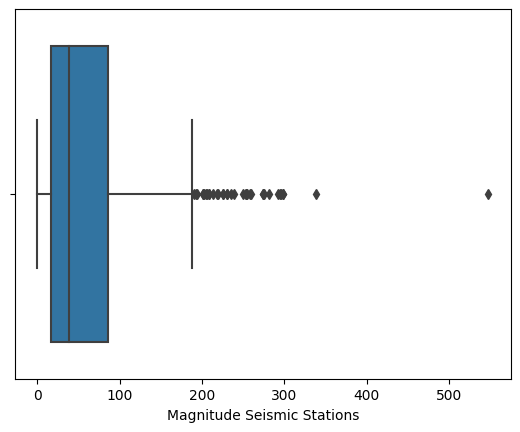

In [ ]:
import seaborn as sn
def remove_outlier(column):
    global df
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[((df[column].isnull()) | ((df[column] >= lower_bound) & (df[column] <= upper_bound)))]

remove_outlier("Azimuthal Gap")
remove_outlier("Magnitude Error")
sn.boxplot(x=df["Magnitude Seismic Stations"])

remove_outlier("Magnitude Seismic Stations")



<Axes: xlabel='Magnitude Seismic Stations'>

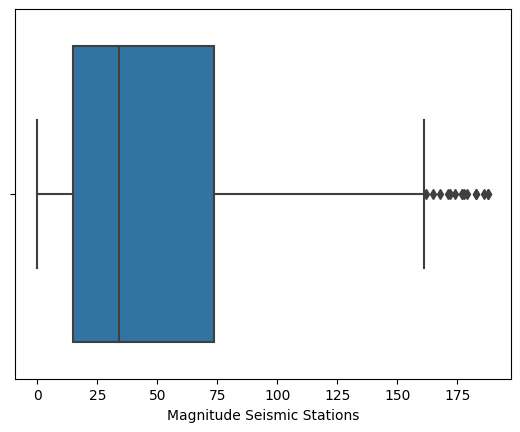

In [ ]:
#After Removing Outlier
sn.boxplot(x=df["Magnitude Seismic Stations"])

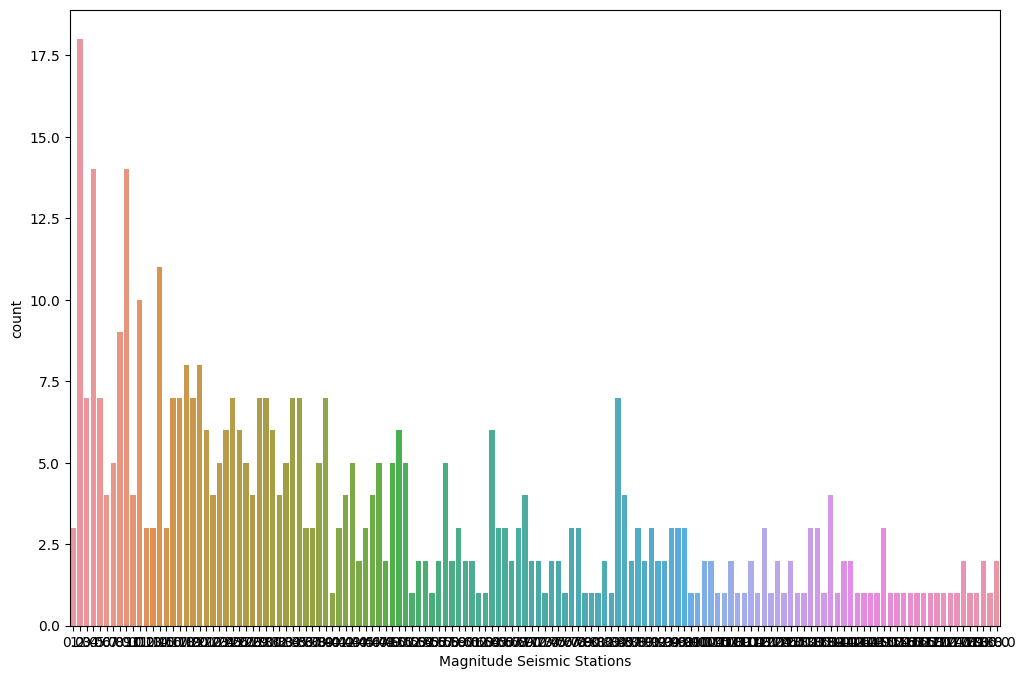

In [ ]:
plt.figure(figsize=(12,8))
sn.countplot(x='Magnitude Seismic Stations',data = df);

In [ ]:
#Mode- Depth Error,MagnitudeError(or mean),RMS
#Magnitude Seismic Station(Mode and Outlier)
#DepthSeismeic Outlier
#Azimuthal Gap Mode Outlier

##Null values
There are a lot of null values present in the dataset. These have to be removed as otherwise we cannot train our model. We can do this by imputing values based on the other values in the dataset.

In [ ]:
df.isnull().sum()

Latitude                         0
Longitude                        0
Depth                            0
Depth Error                   3663
Depth Seismic Stations        3166
Magnitude                        0
Magnitude Type                   0
Magnitude Error               4504
Magnitude Seismic Stations    4076
Azimuthal Gap                 3140
Horizontal Distance           4250
Horizontal Error              4337
Root Mean Square              1184
Source                           0
Location Source                  0
Magnitude Source                 0
Status                           0
Datetime                         0
Timestamp                        0
year                             0
month                            0
day                              0
hour                             0
dtype: int64

We are using the *SimpleImputer* from sklearn.impute for this purpose. It will fill all null cells with relevant data imputed from the other values.

In [ ]:
si=SimpleImputer(missing_values = np.nan, strategy="mean")
si.fit(df[["Depth Error","Depth Seismic Stations","Magnitude Error","Magnitude Seismic Stations","Azimuthal Gap","Horizontal Distance","Horizontal Error","Root Mean Square"]])
df[["Depth Error","Depth Seismic Stations","Magnitude Error","Magnitude Seismic Stations","Azimuthal Gap","Horizontal Distance","Horizontal Error","Root Mean Square"]] = si.transform(df[["Depth Error","Depth Seismic Stations","Magnitude Error","Magnitude Seismic Stations","Azimuthal Gap","Horizontal Distance","Horizontal Error","Root Mean Square"]])
df.isnull().sum()

Latitude                      0
Longitude                     0
Depth                         0
Depth Error                   0
Depth Seismic Stations        0
Magnitude                     0
Magnitude Type                0
Magnitude Error               0
Magnitude Seismic Stations    0
Azimuthal Gap                 0
Horizontal Distance           0
Horizontal Error              0
Root Mean Square              0
Source                        0
Location Source               0
Magnitude Source              0
Status                        0
Datetime                      0
Timestamp                     0
year                          0
month                         0
day                           0
hour                          0
dtype: int64